# **AI Village Capture-the-Flag @DEFCON**
##### Hack AI! Collect flags by evading, poisoning, stealing, and fooling AI/ML

### **Importing necessary modules & packages**

In [1]:
import pandas as pd
import numpy as np
import os, requests
from IPython.display import Image as Ima 
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch, joblib
import matplotlib.pyplot as plt 
import json, base64, shutil

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


### **Helper Function for tracking flags**

In [2]:
def add_flag(challenge_id: str, flag: str) -> str:
    try:
        submission_path = "/home/linux/Workspace/ai-village-ctf/submission/submission.csv"
        template_path = "/home/linux/Workspace/ai-village-ctf/submission.csv"
        if not os.path.isfile(submission_path):
            shutil.copyfile(template_path, submission_path)
        flags = pd.read_csv(submission_path, index_col="challenge_id")
        valid = flags.index.to_list()
        if challenge_id in valid:
            flags.at[challenge_id] = flag
            flags.to_csv(submission_path)
            print("Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day")
        else:
            print("Invalid challenge_id")
    except:
        print("We had trouble saving that flag. Keep a copy of it and contact the CTF organizers.")

### **HOTDOG (id: hotdog) -- 200 Points**

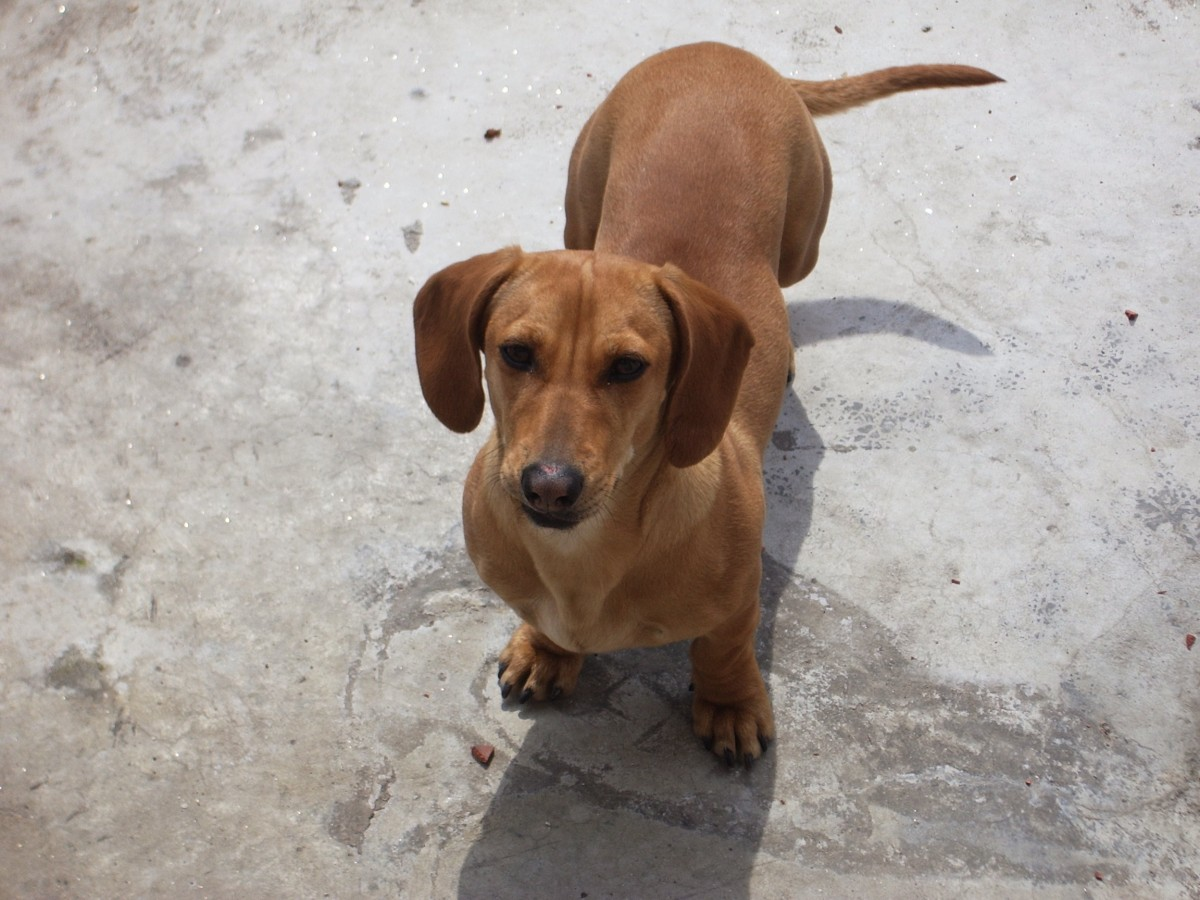

In [3]:
Ima(filename="/home/linux/Workspace/ai-village-ctf/hotdog/chester.png")

In [30]:
from numpy import asarray

IMAGE_DIMS = (224, 224)

img = Im.open("/home/linux/Workspace/ai-village-ctf/hotdog/hotdog.jpg")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "6YOAQVOE0KUBVU}1PGGI515CFX57IGIE837OA1FL3LTCOSFH5EEH2MF5DAB18GRS4WR2HNRRE1E9YDRIF2MPFOP57FFZ2CI8ALRAT049FRD8GHO9J5LE810YQ1R{O2C7"}


In [31]:
add_flag("hotdog", "6YOAQVOE0KUBVU}1PGGI515CFX57IGIE837OA1FL3LTCOSFH5EEH2MF5DAB18GRS4WR2HNRRE1E9YDRIF2MPFOP57FFZ2CI8ALRAT049FRD8GHO9J5LE810YQ1R{O2C7")


Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **MATH**

#### **Math Challenge 1 (id: math_1) -- 100 Points**

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces.

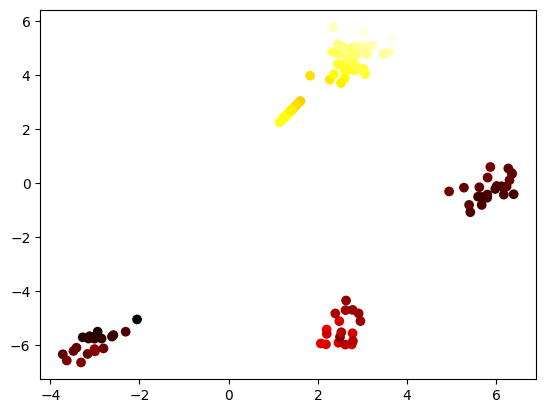

Silhouette Score for k = 2: 0.469
Silhouette Score for k = 3: 0.660
Silhouette Score for k = 4: 0.784
Silhouette Score for k = 5: 0.925
Silhouette Score for k = 6: 0.760
Silhouette Score for k = 7: 0.650
Silhouette Score for k = 8: 0.562


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters1 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters1.npy")
clusters2 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters2.npy")
clusters3 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters3.npy")

plt.scatter(clusters1[:, 0], clusters1[:, 1], c=clusters1[:, 2], cmap="hot")
plt.show()

limit = int((clusters1.shape[0]//2)**0.5)
for i in range(2, limit+1):
    model = KMeans(n_clusters=i)
    model.fit(clusters1)
    pred = model.predict(clusters1)
    score = silhouette_score(clusters1, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(i, score))

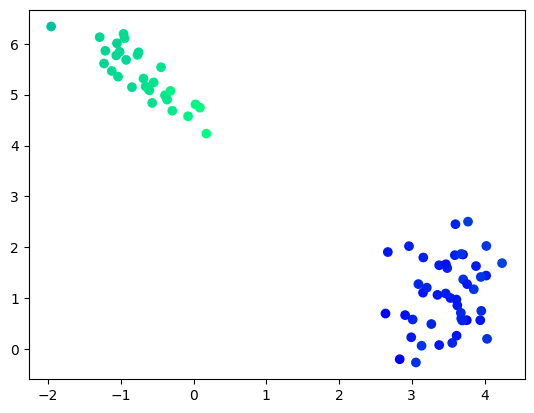

Silhouette Score for k = 2: 0.899
Silhouette Score for k = 3: 0.458
Silhouette Score for k = 4: 0.458
Silhouette Score for k = 5: 0.473
Silhouette Score for k = 6: 0.199


In [25]:
plt.scatter(clusters2[:, 0], clusters2[:, 1], c=clusters2[:, 2], cmap="winter")
plt.show()

limit2 = int((clusters2.shape[0]//2)**0.5)
for j in range(2, limit2+1):
    model = KMeans(n_clusters=j)
    model.fit(clusters2)
    pred = model.predict(clusters2)
    score = silhouette_score(clusters2, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(j, score))

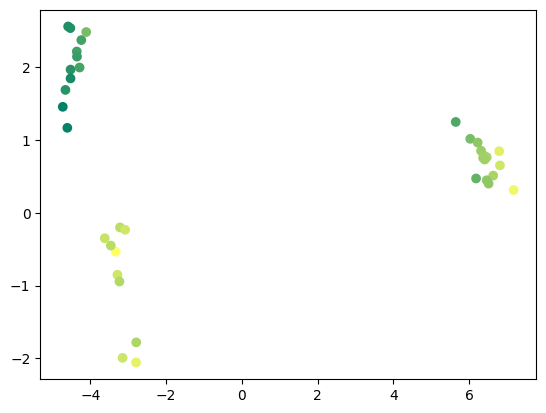

Silhouette Score for k = 2: 0.632
Silhouette Score for k = 3: 0.903
Silhouette Score for k = 4: 0.757


In [26]:
plt.scatter(clusters3[:, 0], clusters3[:, 1], c=clusters3[:, 2], cmap="summer")
plt.show()

limit3 = int((clusters3.shape[0]//2)**0.5)
for k in range(2, limit3+1):
    model = KMeans(n_clusters=k)
    model.fit(clusters3)
    pred = model.predict(clusters3)
    score = silhouette_score(clusters3, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

In [27]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": "523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is X0DSW8JG9LJE0VM318N316M8QGQ{6EKDZJ6D4H1HDZ64KK2XV3HLJUHETTVOWPUN}MYNHMKJLUWGK03T8A7UUAFGDGTFSO59PIAKB6I2LTZV0ZTNV4W1JFILPHBV90YV.


In [28]:
add_flag("math_1", "X0DSW8JG9LJE0VM318N316M8QGQ{6EKDZJ6D4H1HDZ64KK2XV3HLJUHETTVOWPUN}MYNHMKJLUWGK03T8A7UUAFGDGTFSO59PIAKB6I2LTZV0ZTNV4W1JFILPHBV90YV")


Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


#### **Math Challenge 2 (id: math_2) -- 200 Points**

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy?

In [106]:
first_dim1 = np.load("/home/linux/Workspace/ai-village-ctf/math/first_dim1.npy")
first_dim2 = np.load("/home/linux/Workspace/ai-village-ctf/math/first_dim2.npy")
first_dim3 = np.load("/home/linux/Workspace/ai-village-ctf/math/first_dim3.npy")

np.add.reduce(first_dim2)

array([-2.58862532,  7.5433355 , -7.75911229, -4.60525993,  0.57794627,
        2.45142995, -2.79592053,  2.35335108,  1.49750602])

In [97]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                      json=json.dumps({"challenge_id": "math_2", "submission": "198"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

That doesn't look right. Try again.


In [33]:
add_flag("math_2", "YOURFLAGHERE")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **WIFI (id: wifi) -- 200 Points**

Check out the ```wifi/Embedded_characters.npz``` file -- a list of tokens is given in the ```tokens``` key with their corresponding embeddings in the same order under the ```embeddings``` key -- and recover the password.

In [153]:
embedded_characters = np.load("/home/linux/Workspace/ai-village-ctf/wifi/Embedded_characters.npz")
tokens = embedded_characters['tokens'][()]
embeddings = np.array(embedded_characters['embeddings'])

In [154]:
print(len(tokens))
print(embeddings.shape)

188
(188, 512)


In [161]:
password = {}
for i in range(len(tokens)):
    password[tokens[i]] = embeddings[i]

password

{'!': array([-2.40908323e-02,  7.64982305e-03,  2.58257098e-02, -9.93387304e-03,
         3.70369736e-02, -3.26501974e-02, -4.67337272e-03,  1.39862989e-02,
         1.23476687e-02, -5.24821584e-03,  3.51585861e-02,  1.29718720e-02,
         1.49612819e-03,  2.30115978e-04,  4.09406376e-02,  2.58070925e-03,
         2.01572560e-02,  1.02453144e-02, -4.17603703e-03, -2.51877653e-02,
         4.89806517e-03,  7.40594540e-03, -2.64876011e-02,  1.06935444e-02,
         1.87703118e-02,  2.69346804e-02, -2.70156718e-02,  1.13615662e-02,
        -5.72572920e-03,  1.87580294e-02, -2.04962195e-02,  4.13015458e-02,
        -3.71683501e-03,  2.27751562e-03, -1.77360593e-02, -9.71528100e-03,
        -2.01018346e-02, -2.75129807e-02,  2.27585695e-03,  4.55947732e-02,
        -1.14832607e-02,  5.35476940e-03,  3.76762566e-02,  1.08691949e-02,
        -2.53653695e-02,  3.87436917e-03, -1.56830319e-02,  2.80238305e-02,
        -2.25617351e-02, -2.39413917e-02, -1.93294348e-02, -1.80691596e-02,
       

In [186]:
format = ["F", "L", "A", "G", "{", "s", "o", "m", "e", "t", "h", "i", "n", "g", "}"]
my_passwdd = [password["F"], password["L"], password["A"], password["G"], password["{"], password["s"], password["o"], 
        password["m"], password["e"], password["t"], password["h"], password["i"], password["n"], password["g"], password["}"]]

passwd = np.array(my_passwdd)
passwd

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00633694,  0.01444667,  0.05574101, ...,  0.02096411,
        -0.06223865, -0.06483109],
       [ 0.03055021,  0.00261717,  0.01573959, ...,  0.02784465,
        -0.00176248, -0.08600512],
       ...,
       [ 0.00932619,  0.00024318,  0.00261711, ...,  0.0075088 ,
         0.00178316, -0.02318991],
       [ 0.01044768, -0.00149373, -0.00402058, ...,  0.00526111,
         0.00937398, -0.01623779],
       [-0.00038671, -0.01712508, -0.06748112, ..., -0.0308428 ,
         0.07140732,  0.09535483]])

In [107]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

That doesn't look right. Try again.


In [108]:
add_flag("wifi", "YOURFLAGHERE")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **HOTTERDOG (id: hotterdog) -- 400 Points**

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

In [188]:
IMAGE_DIMS = (224, 224)

img = Im.open("/home/linux/Workspace/ai-village-ctf/hotterdog/chester.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotterdog.fly.dev/score",
                      data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"output": ["Rhodesian_ridgeback", 0.6307]}


In [189]:
add_flag("hotterdog", "YOURFLAGHERE")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Honorstudent (id: honorstudent) -- 300 Points**

Modify and submit your tampered f.png. Be careful to not overdo it!

In [190]:
Ima(filename='/home/linux/Workspace/ai-village-ctf/honorstudent/f.png')